In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

%load_ext google.colab.data_table

Authenticated


Group Users By Year Of Their First Visit

In [ ]:
%%bigquery --project 

select
    extract(year from timestamp_micros(user_first_touch_timestamp)) as year_first_touch,
    count(distinct user_pseudo_id) as users
from
    `ga.events_*`
group by 
    1
having 
    year_first_touch is not null
order by
    year_first_touch desc

,year_first_touch,users
0,2021,38304781
1,2020,11206758


CONCAT

In [ ]:
%%bigquery --project 

select
    concat(user_pseudo_id,'.',(select value.int_value from unnest(event_params) where event_name = 'page_view' and key = 'ga_session_id')) as true_session_id,
from
    `ga.events_*`
where
    _table_suffix between '20210805' and format_date('%Y%m%d',date_sub(current_date(), interval 1 day))
group by 
    1
order by
    1 desc

,true_session_id
0,zyPBg3tWYfjUGXLM3SvZGHLN6uyOoSqQ88EdxjOZnXQ=.1...
1,zyPBg3tWYfjUGXLM3SvZGHLN6uyOoSqQ88EdxjOZnXQ=.1...
2,zyPBg3tWYfjUGXLM3SvZGHLN6uyOoSqQ88EdxjOZnXQ=.1...
3,zsbDT/ndEOaevuFNbJdctbLatY7v+CAlO8gUr6m/o5I=.1...
4,zsSr5uQMzHiFkvi9Cm/LF3xgZDB4gW7p/FtIfzUiJf8=.1...
...,...
10226,+QKJOvTrgrdiF1r1wIyOcRqfBQWUWckODQcAXJFL37M=.1...
10227,+QECf5/MK0FI/ixy17XmtN6UOalVHYZbkws3bL80oBs=.1...
10228,+QECf5/MK0FI/ixy17XmtN6UOalVHYZbkws3bL80oBs=.1...
10229,+Li2/nMVGh2gCZ4T5qQOKkEltapg2xi+X/kMocKJ6vo=.1...


In [2]:
%%bigquery --project 

select
    concat(traffic_source.source,' / ',traffic_source.medium) as source_medium,
    traffic_source.source,
    traffic_source.medium,
    traffic_source.name as campaign,
    count(distinct user_pseudo_id) as users
from
    `ga.events_20210601`
group by 
    source_medium,
    source,
    medium,
    campaign
order by
    users desc
LIMIT 2

,source_medium,source,medium,campaign,users
0,google / organic,google,organic,(organic),3324
1,(direct) / (none),(direct),(none),(direct),1013


NULLIF

Wstawianie NULL np. zamiast iPhone

https://cloud.google.com/bigquery/docs/reference/standard-sql/conditional_expressions#nullif

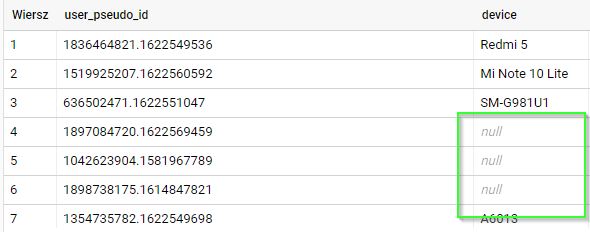

In [ ]:
%%bigquery --project 

# Tam gdzie jest iPhone daj NULL

select
    user_pseudo_id,
    nullif(device.mobile_model_name, 'iPhone') device
from
    `ga_206575074.events_20210601`
where 
    device.category = 'mobile'
group by 
    1,2
LIMIT 5

,user_pseudo_id,device
0,1836464821.1622549536,Redmi 5
1,1519925207.1622560592,Mi Note 10 Lite
2,636502471.1622551047,SM-G981U1
3,1897084720.1622569459,None
4,1042623904.1581967789,None


In [ ]:
%%bigquery --project 

# Tam gdzie jest pusty znak daj NULL

select
    geo.continent,
    geo.country,
    nullif(geo.city,'') as city,
    count(distinct user_pseudo_id) as users
from
    `ga.events_20210601`
group by 
    continent,
    country,
    city
order by 
    users desc
LIMIT 15

,continent,country,city,users
0,Europe,Ireland,Dublin,112
1,Europe,United Kingdom,London,110
2,Europe,Germany,Berlin,71
3,Europe,Sweden,Stockholm,66
4,Oceania,Australia,Sydney,59
5,Europe,Spain,Madrid,54
6,Americas,United States,New York,54
7,Europe,France,Paris,52
8,Oceania,Australia,Melbourne,51
9,Europe,Russia,Moscow,48
